# Tarea: Predicción de reserva de hotoles

Imaginemos que una empresa está en busca de un Científico de Datos. Nos piden realizar una tarea técnica para comprobar que el postulante cumple con los requisitos para el puesto. 

La tarea consiste en generar un modelo de Inteligencia Artificial que sea capaz de predecir si una reserva de hotel será cancelada.

Nos proprocionan el archivo de datos (bookings.csv) que contiene datos sobre la reserva de un hotel urbano y de un hotel turístico, e incluye información como la fecha de la reserva, la duración de la estancia, el número de adultos, niños y/o bebés, y el número de plazas de aparcamiento disponibles, entre otras variables.

## Importar bibliotecas

Lo primero que debemos hacer es cargar los módulos necesarios para resolver el problema propuesto.

In [19]:
import pandas as pd
import numpy as np
import io

## Descarga del fichero de datos bookings.csv
# El fichero puede descargarse directamente de la fuente proporcionada, o se
# puede utilizar el siguiente código para descargarlo de google drive:
# URL: https://drive.google.com/file/d/1kS5vwDx1h0gztjnpWQnRRC8DtOCqn2Sh
!gdown --id 1kS5vwDx1h0gztjnpWQnRRC8DtOCqn2Sh

## Carga del fichero en Python
df_train = pd.read_csv("bookings.csv", delimiter=",")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kS5vwDx1h0gztjnpWQnRRC8DtOCqn2Sh
To: /content/bookings.csv
100% 16.9M/16.9M [00:00<00:00, 63.9MB/s]


# Visualización de los datos

**Antes de comenzar con el preprocesamiento de los datos necesitamos analizarlos y entender un poco el dataset. Utiliza las diferentes funciones y gráficos que hemos visto para hacerte una idea del dataset con el que estamos trabajando. Esta información guiará el preprocesamiento de los datos.**

In [20]:
df_train.shape

(119390, 32)

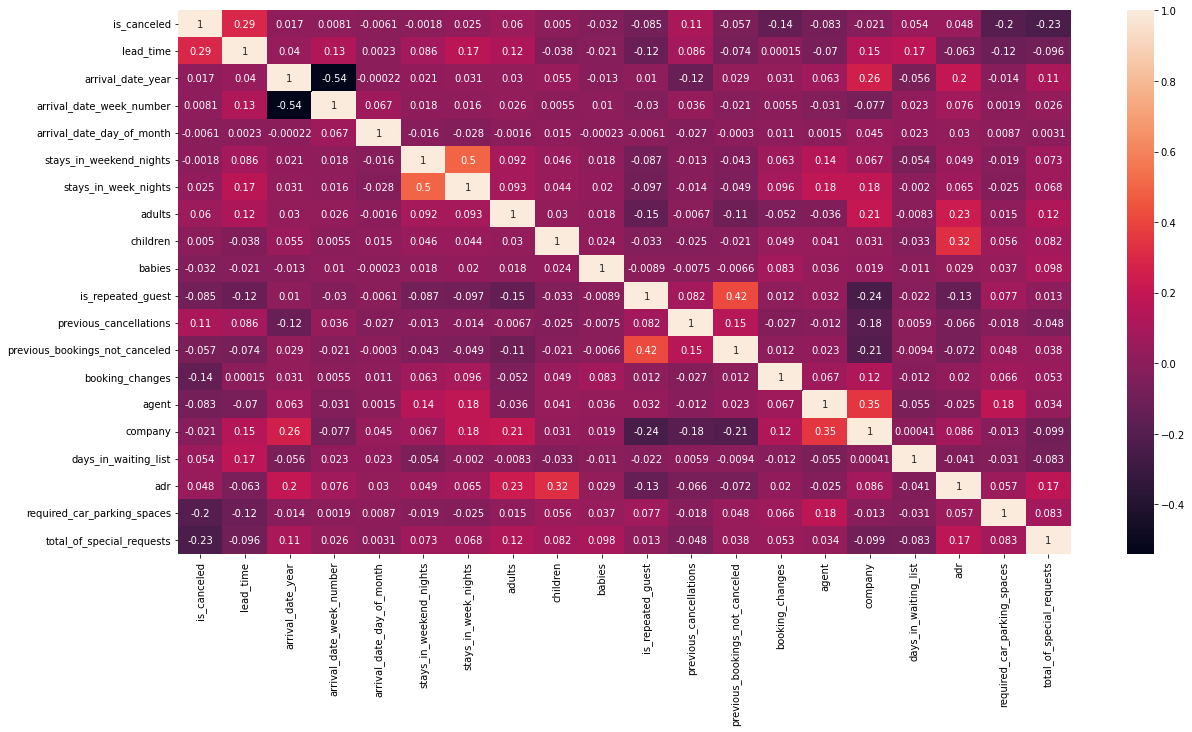

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [22]:
df_train.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
83656,City Hotel,0,20,2016,February,7,7,2,1,2,...,No Deposit,9.0,NaN,0,Transient,93.00,0,2,Check-Out,2016-02-10
107455,City Hotel,0,68,2017,March,10,7,1,5,2,...,No Deposit,22.0,NaN,0,Transient,68.00,0,1,Check-Out,2017-03-13
73498,City Hotel,1,185,2017,August,34,24,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Canceled,2017-04-17
90437,City Hotel,0,85,2016,June,23,4,1,1,1,...,No Deposit,9.0,NaN,0,Transient,117.00,0,1,Check-Out,2016-06-06
105069,City Hotel,0,9,2017,January,4,27,0,2,2,...,No Deposit,7.0,NaN,0,Transient,83.16,0,1,Check-Out,2017-01-29


<BarContainer object of 2 artists>

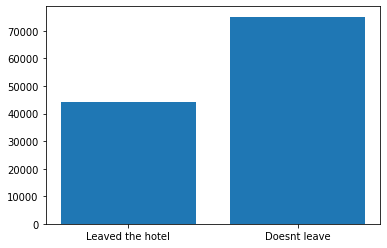

In [23]:
leaves = df_train[df_train['is_canceled'] == 1].shape[0]
no_leaves = df_train[df_train['is_canceled'] == 0].shape[0]
plt.bar(['Leaved the hotel', 'Doesnt leave'], [leaves, no_leaves])

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Preprocesamiento del dataset

**Dentro del preprocesamiento del dataset puedes utilizar diferentes técnicas como las vistas en (https://colab.research.google.com/drive/1wRjnm9sIkfBVef2VGoT6nsk77nmdR3j7). Por ejemplo:**

*   **Baleancear los datos**
*   **Eliminar columnas por los motivos que consideres (muchos valores nulos, no está correlacionado con la clase a predecir, ...)**
*   **Modificar columnas. Por ejemplo sutituir valores nulos por otros, clasificar una columna numérica en diferentes grupos (por ejemplo, cuartiles), ...**
*   **Crear nuevas columnas. Por ejemplo eliminando columnas categóricas, agregando un conjunto de columnas en otra, ...**
*   **Normalizar los datos**
*   **...**



### Downsampling

In [25]:
from sklearn.utils import resample

df_may = df_train[df_train["is_canceled"] == 0]
df_min = df_train[df_train["is_canceled"] == 1]

df_majority_downsampled = resample(df_min, 
                                 n_samples=len(df_may),
                                 replace=True) 

df_train = pd.concat([df_may, df_majority_downsampled])

###Eliminar columnas nulas
Mediante varias pruebas se ha determinado que las columnas con valores nulos no permiten al modelo progresar, se eliminaran todas

In [26]:
df_train.isnull().any() 

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [27]:
df_train.dropna(axis=1, inplace=True)

##Eliminar columnas con poco peso para el resutlado 
Dado que el valor de estas columnas es muy proximo a 0 en relacion a `is_cancelled` seran eliminadas

In [28]:
variables = df_train.corr().loc[:, 'is_canceled']
corr_variables = variables[np.abs(variables) < 0.015].index

for x in corr_variables:
   df_train.pop(x)

###Descategorizar columnas mediante OneHotEncode
Para ello obtenemos las variables categoricas y las transformamos solo las que tengan un maximo de 12 valores unicos con la funcion anterior de `onehot_encode` el resto de columnas seran eliminadas





In [29]:
def onehot_encode(df, column):
    for name in column:
      df = df.copy()
      dummies = pd.get_dummies(df[name], prefix=name) 

      df = pd.concat([df, dummies], axis=1)
      df = df.drop(name, axis=1)         
    return df

Obtenemos columnas categoricas, eliminamos o normalizamos segun el criterio anterior

In [30]:
categorical_columns = (df_train.dtypes[df_train.dtypes == 'object'].index)

for x in categorical_columns:
  if df_train[x].unique().size <= 12:
    df_train = onehot_encode(df_train, [x])
  else:
    df_train.pop(x)

###Data split
Separamos conjuntos de entrenamiento, evaluacion (80% para entrenamiento del cual un 20% sera para validacion) y testing un 20%



In [31]:
from sklearn.model_selection import train_test_split

df_train_y = df_train["is_canceled"]
df_train_x = df_train.drop("is_canceled", axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, train_size=0.8, shuffle=True, random_state=1, stratify=df_train['is_canceled'])

###Normalizacion

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                                                 
nomalized_train = scaler.fit_transform(X_train)                        
nomalized_test = scaler.transform(X_test)                        
X_train = pd.DataFrame(nomalized_train, columns=X_train.columns)
X_test = pd.DataFrame(nomalized_test, columns=X_test.columns)

# Construir y entrenar red neuronal

**Construye una red neuronal, entrenala y evalua los resultados.**

In [33]:
#importa las librerías necesarias
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

In [43]:
#arquitectura red neuronal y compilación
model = Sequential()

model.add(Dense(5, activation="relu", input_shape=(77,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 396
Trainable params: 396
Non-trainable params: 0
_________________________________________________________________


Realizamos la separacion para validacion del 20% mencionada anteriormente y añadimos shuffle

In [44]:
history = model.fit(X_train, y_train, batch_size=128, epochs=3, shuffle=True, validation_split=0.2)

Epoch 1/3
752/752 [==============================] - 6s 6ms/step - loss: 0.3517 - accuracy: 0.9060 - val_loss: 0.2050 - val_accuracy: 1.0000
Epoch 2/3
752/752 [==============================] - 5s 7ms/step - loss: 0.1522 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 1.0000
Epoch 3/3
752/752 [==============================] - 4s 5ms/step - loss: 0.0905 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 1.0000


##Evaluacion de resultados

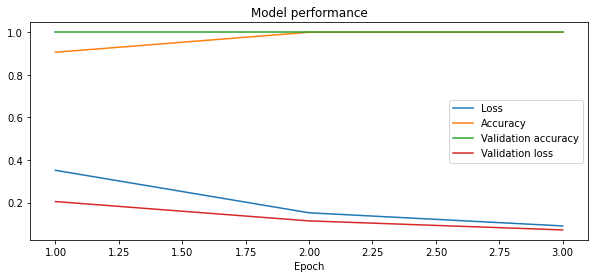

In [46]:
plt.figure(figsize=(10, 4))
plt.title("Model performance")
plt.plot(np.arange(1, 4), history.history["loss"], label="Loss")
plt.plot(np.arange(1, 4), history.history["accuracy"], label="Accuracy")
plt.plot(np.arange(1, 4), history.history["val_accuracy"], label="Validation accuracy")
plt.plot(np.arange(1, 4), history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend()

###Mostrar matriz de confusion

940/940 [==============================] - 1s 1ms/step


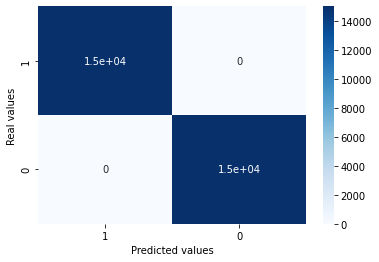

In [47]:
from sklearn.metrics import confusion_matrix

# Hacer predicciones con el modelo
predictions = model.predict(X_test)
predictions = np.round(predictions) 

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues');
ax.set_xlabel('Predicted values');
ax.set_ylabel('Real values');
ax.xaxis.set_ticklabels([1, 0]); 
ax.yaxis.set_ticklabels([1, 0]);
plt.show()

###Mostrar precision del modelo

In [48]:
scores = model.evaluate(X_test, y_test)
print(f'Precision del modelo: {scores[1]:.4f}')  

940/940 [==============================] - 2s 2ms/step - loss: 0.0716 - accuracy: 1.0000
Precision del modelo: 1.0000


In [49]:
y_test.shape

(30067,)

#Conclusion
Podemos observar tras visualizar la matriz de confusion y precion del modelo con los datos de testing (~30.000 ocurrencias las cuales el modelo no conoce) que la precision es del **100%**.
Durante el entrenamiento no vimos ningun signo de overfitting dado que empleamos parte del set de entrenamiento para realizar la validacion. De haber ocurrido obtendriamos un valor de acierto muy alto en "Accuracy" pero bajo en "Validation accuracy" o en la fase de `model.evaluate()`